## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataset = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_dataset["Mouse ID"].count()


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merged_dataset["Timepoint"].unique()
#merged_dataset.head()

duplicates = merged_dataset[merged_dataset.duplicated(keep = 'last')]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
#remove duplicates
dropped_merged = merged_dataset.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
dropped_merged.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#clean dataset count
dropped_merged["Mouse ID"].count()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_dataset_df = pd.DataFrame(dropped_merged)
new_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
new_dataset_df.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

avg = new_dataset_df.groupby(["Drug Regimen"]).mean()
avg.head()

avg_df = pd.DataFrame(avg)
avg_df.head()
avg_df.columns = ["Mean Age (Months)", "Mean Weight (g)", "Mean Timepoint", "Mean Tumor Vol. (mm3)",
                  "Mean Metastatic Sites"]

avg_df.head()


,Mean Age (Months),Mean Weight (g),Mean Timepoint,Mean Tumor Vol. (mm3),Mean Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796


In [10]:
#new_dataset_df.median()

median = new_dataset_df.groupby(["Drug Regimen"]).median()
median.head()

median_df = pd.DataFrame(median)
median_df.head()
median_df.columns = ["Median Age (Months)", "Median Weight (g)", "Media  Timepoint", "Median Tumor Vol. (mm3)",
                  "Median Metastatic Sites"]
median_df.head()

,Median Age (Months),Median Weight (g),Media Timepoint,Median Tumor Vol. (mm3),Median Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0


In [11]:
#new_dataset_df.var()
varians = new_dataset_df.groupby(["Drug Regimen"]).var()
varians.head()

varians_df = pd.DataFrame(varians)
varians_df.head()
varians_df.columns = ["Var. Age (Months)", "Var. Weight (g)", "Var. Timepoint", "Var. Tumor Vol. (mm3)",
                  "Var. Metastatic Sites"]
varians_df

,Var. Age (Months),Var. Weight (g),Var. Timepoint,Var. Tumor Vol. (mm3),Var. Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,51.678867,2.845658,184.180108,43.220205,1.193507
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [12]:
#new_dataset_df.std()
deviation = new_dataset_df.groupby(["Drug Regimen"]).std()
deviation.head()

deviation_df = pd.DataFrame(deviation)
deviation_df.head()
deviation_df.columns = ["Dev. Age (Months)", "Dev. Weight (g)", "Dev. Timepoint", "Dev. Tumor Vol. (mm3)",
                  "Dev. Metastatic Sites"]
deviation_df


,Dev. Age (Months),Dev. Weight (g),Dev. Timepoint,Dev. Tumor Vol. (mm3),Dev. Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.188801,1.686908,13.571297,6.574208,1.092477
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [13]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

combined_data = avg_df.join(median_df)
combined_data2 = combined_data.join(varians_df)
combined_data3 = combined_data2.join(deviation_df)
combined_data3.head()



,Mean Age (Months),Mean Weight (g),Mean Timepoint,Mean Tumor Vol. (mm3),Mean Metastatic Sites,Median Age (Months),Median Weight (g),Media Timepoint,Median Tumor Vol. (mm3),Median Metastatic Sites,Var. Age (Months),Var. Weight (g),Var. Timepoint,Var. Tumor Vol. (mm3),Var. Metastatic Sites,Dev. Age (Months),Dev. Weight (g),Dev. Timepoint,Dev. Tumor Vol. (mm3),Dev. Metastatic Sites
Drug Regimen,,,,,,,,,,,,,,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,16.5,20.5,20.0,41.557809,0.0,59.620372,7.466034,206.928043,24.947764,0.720790,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,12.0,28.0,20.0,51.776157,1.0,65.147591,2.501016,204.031772,39.290177,1.402527,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,20.0,27.0,15.0,51.820584,1.0,56.404272,4.769028,181.534470,43.128684,1.054942,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,18.0,28.0,20.0,53.698743,1.0,36.236432,3.392536,196.839089,68.553577,1.942883,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,9.0,27.0,20.0,52.509285,1.0,45.102703,2.247748,201.208951,66.173479,1.479919,6.715855,1.499249,14.184814,8.134708,1.216519


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#sem_all = st.sem(new_dataset_df["Tumor Volume (mm3)"])
#sem_all

#sem_drug_group = new_dataset_df.groupby("Drug Regimen")
#sem_drug_group.head()

#sem_drug["Drug Regimen"] = st.sem('Tumor Volume (mm3)')
# This method produces everything in a single groupby function

new_dataset_df.loc[new_dataset_df.Drug Regimen == 'Capomulin', "Tumor Volume (mm3)"]

SyntaxError: invalid syntax (3621142230.py, line 11)

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

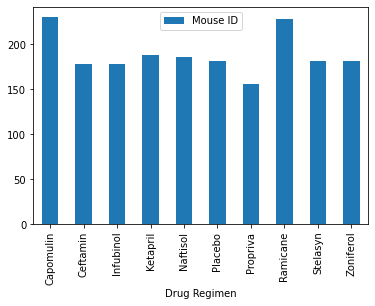

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

DR = new_dataset_df.groupby("Drug Regimen").count()
#DR.head()
DR = DR.reset_index()
DR.head(20)
DR.plot.bar(x="Drug Regimen",y="Mouse ID")


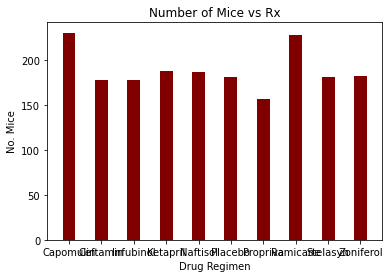

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

regimen = DR["Drug Regimen"]
number = DR["Mouse ID"]
plt.bar(regimen, number, color ='maroon',
        width = 0.4)
 
plt.xlabel("Drug Regimen")
plt.ylabel("No. Mice")
plt.title("Number of Mice vs Rx")
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = new_dataset_df.sum()["Sex"["Male"]]
gender
new_dataset_df[('Sex')].plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(10,10))


TypeError: string indices must be integers

<function matplotlib.pyplot.legend(*args, **kwargs)>

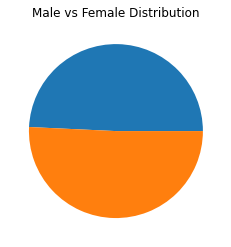

In [319]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(SX["Mouse ID"])
plt.title("Male vs Female Distribution")
plt.legend

## Quartiles, Outliers and Boxplots

In [318]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumour_vol = new_dataset_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
tumour_vol_df = pd.DataFrame(tumour_vol)
tumour_vol_df
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ketapril,10384.299876
Naftisol,10105.671026
Placebo,9780.078122
Propriva,8171.746946
Ramicane,9169.417875
Stelasyn,9816.199991


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
